In [61]:
#installation des packages nécéssaires
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [62]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from langdetect import detect # pour detecter les langues
from wordcloud import WordCloud # pour gerer les nuages de mots
import sklearn as sk
from deep_translator import GoogleTranslator 



In [63]:
#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 


#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# pour analyser les sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#pour les top_10 des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

[nltk_data] Downloading package stopwords to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
df = pd.read_csv(r'Database.csv', )
df

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,False,Conseillère clientèle,Massy (91),2022,"Bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,False,Responsable,Falaise,2022,"Équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,False,Compliance Officer,Nanterre (92),2022,"bonne ambiance, bonne équipe, bon relationnel,..."
3,France,5.0,NaN,False,Assistante administrative,Saint-Dié-des-Vosges (88),2022,"Missions variées, solidarité dans l’équipe et ..."
4,France,4.0,NaN,False,Chargée de communication,La Défense (92),2022,Première expérience professionnelle durant 3 a...
...,...,...,...,...,...,...,...,...
2515,Indie,4.0,NaN,True,Business Analyst,"Bangalore, KA",2012,A good working environment with good work-life...
2516,Indie,5.0,NaN,True,Auditor,Mumbai,2012,"SA 8000, EMS & Social Audits\r\nBPP Audits in ..."
2517,Indie,5.0,NaN,False,Software Engineer,"Bangalore, KA",2012,nice banking bussiness. had a great time worki...
2518,Indie,5.0,NaN,False,Software Engineer,"Bangalore, KA",2012,This is a euro bank and i had great fun in lea...


# Distribution par colonnes

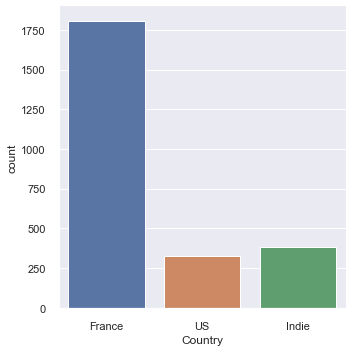

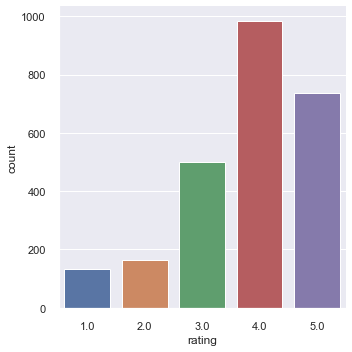

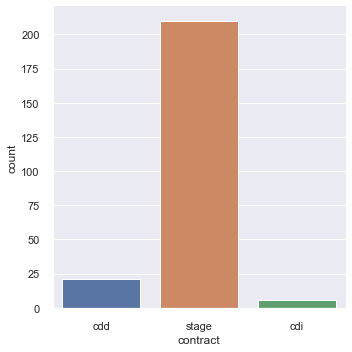

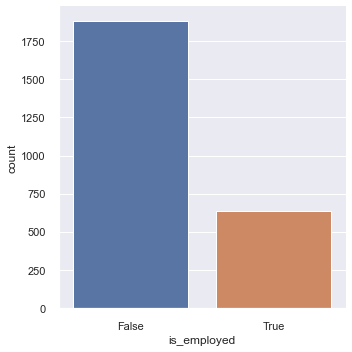

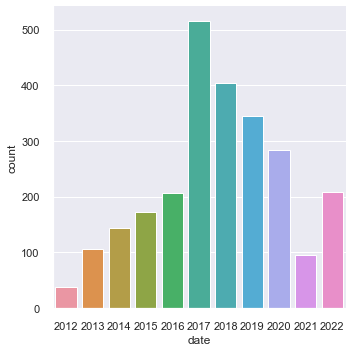

In [65]:
for col in ['Country', 'rating', 'contract', 'is_employed', 'date']:
    sns.catplot(data=df, x=col, kind='count')
    plt.show()

on a remarqué  qu'il y a plus de commentaires en France que dans les autres pays, la majorité d'entre eux mettent une note supérieure ou égale à 4 donc la majorité est satisfaite de son travail à la Société Générale et Seulement 237 personnes ont précisé leur contrat de travail à la Société Générale et ce sont principalement des stagiaires, nous avons aussi remarqué que la majorité d'entre eux sont d'anciens employés.

Le nombre de commentaires sur la Société Générale augmente entre 2012 et 2017 puis diminue jusqu'en 2021, on remarque une très forte baisse en 2021 peut-être due à Covid-19.

## Distribution des top ten Cities

<AxesSubplot:>

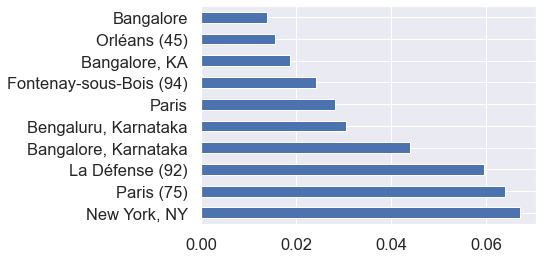

In [66]:
# strip les espaces de la colonne city
# Todo: faire cela dans le scrapping

df['city'] = df['city'].apply(lambda x: str(x).strip(' '))

sns.set_theme(font_scale=1.5)
cities = df['city'].value_counts(normalize=True)
top_cities = cities.nlargest(10)
top_cities.plot(kind='barh', legend=False)

# Distribution des Ratings

## Rating: anciens employés vs employé actuelles

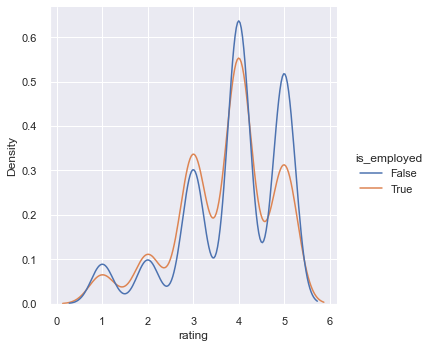

In [67]:
sns.set_theme(font_scale=1)
sns.displot(data=df, x='rating', hue='is_employed', kind='kde',common_norm=False)

En comparant les anciens employés et les employés actuels, nous avons remarqué que les anciens employés donnent la note 5/5 de plus que les employés actuels.

## Rating: Contrat

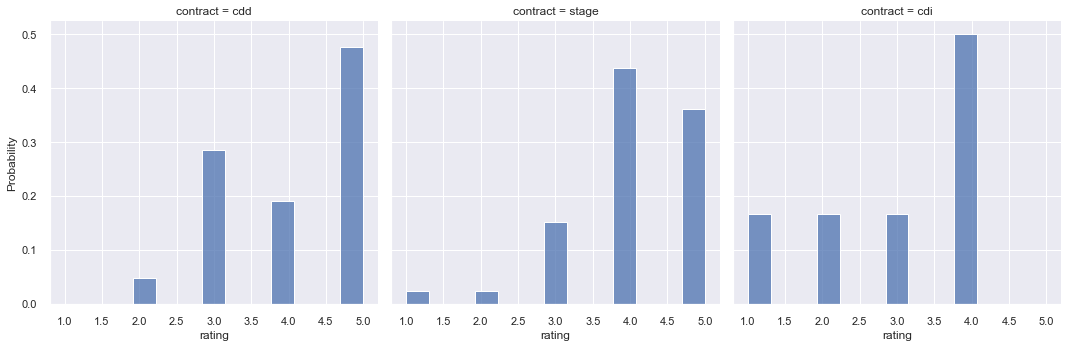

In [68]:
sns.displot(data=df, x='rating', col='contract', kind='hist', stat='probability', common_norm=False)

<AxesSubplot:xlabel='rating', ylabel='contract'>

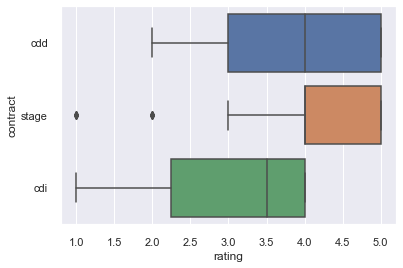

In [69]:
sns.boxplot(data=df, x='rating', y='contract')

Nous avons constaté que les commentaires des stagiaires se situent davantage entre 4 et 5, tandis que ceux qui ont un CDI se situent entre 2,25 et 4, donc moins satisfaits que les stagiaires et ceux qui ont un CDD.

## Rating: pays

<AxesSubplot:xlabel='rating', ylabel='Country'>

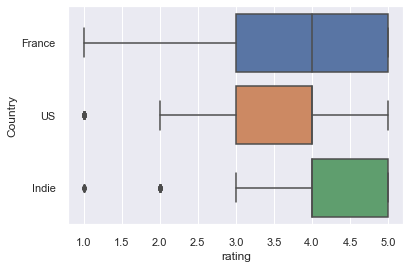

In [70]:
sns.boxplot(data=df, x='rating', y='Country')

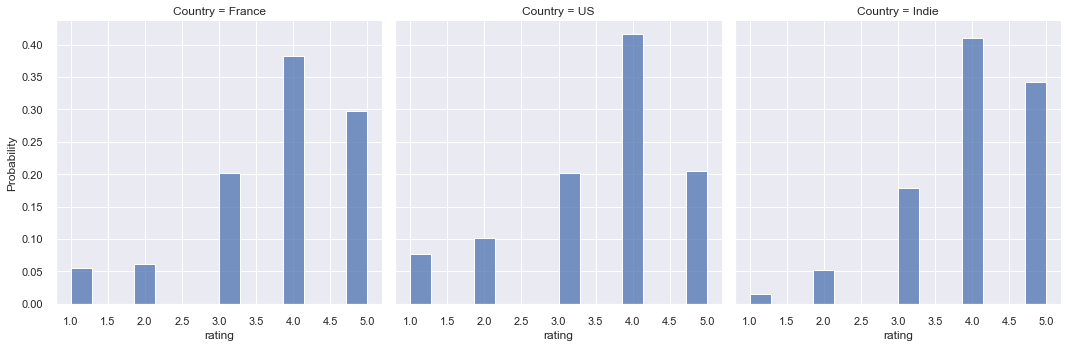

In [71]:
sns.displot(data=df, x='rating', col='Country', kind='hist', stat='probability', common_norm=False)

## Ratings: top10 villes

<AxesSubplot:xlabel='rating', ylabel='city'>

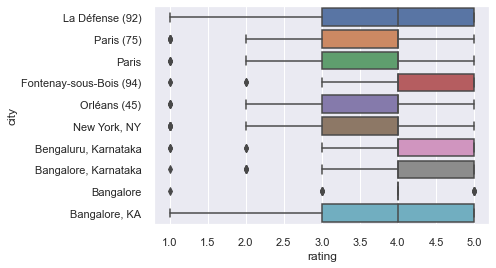

In [72]:
top_cities_index = [city in top_cities.index for city in df['city']]
sub_df = df[top_cities_index]
sns.boxplot(data=sub_df, x='rating', y='city')

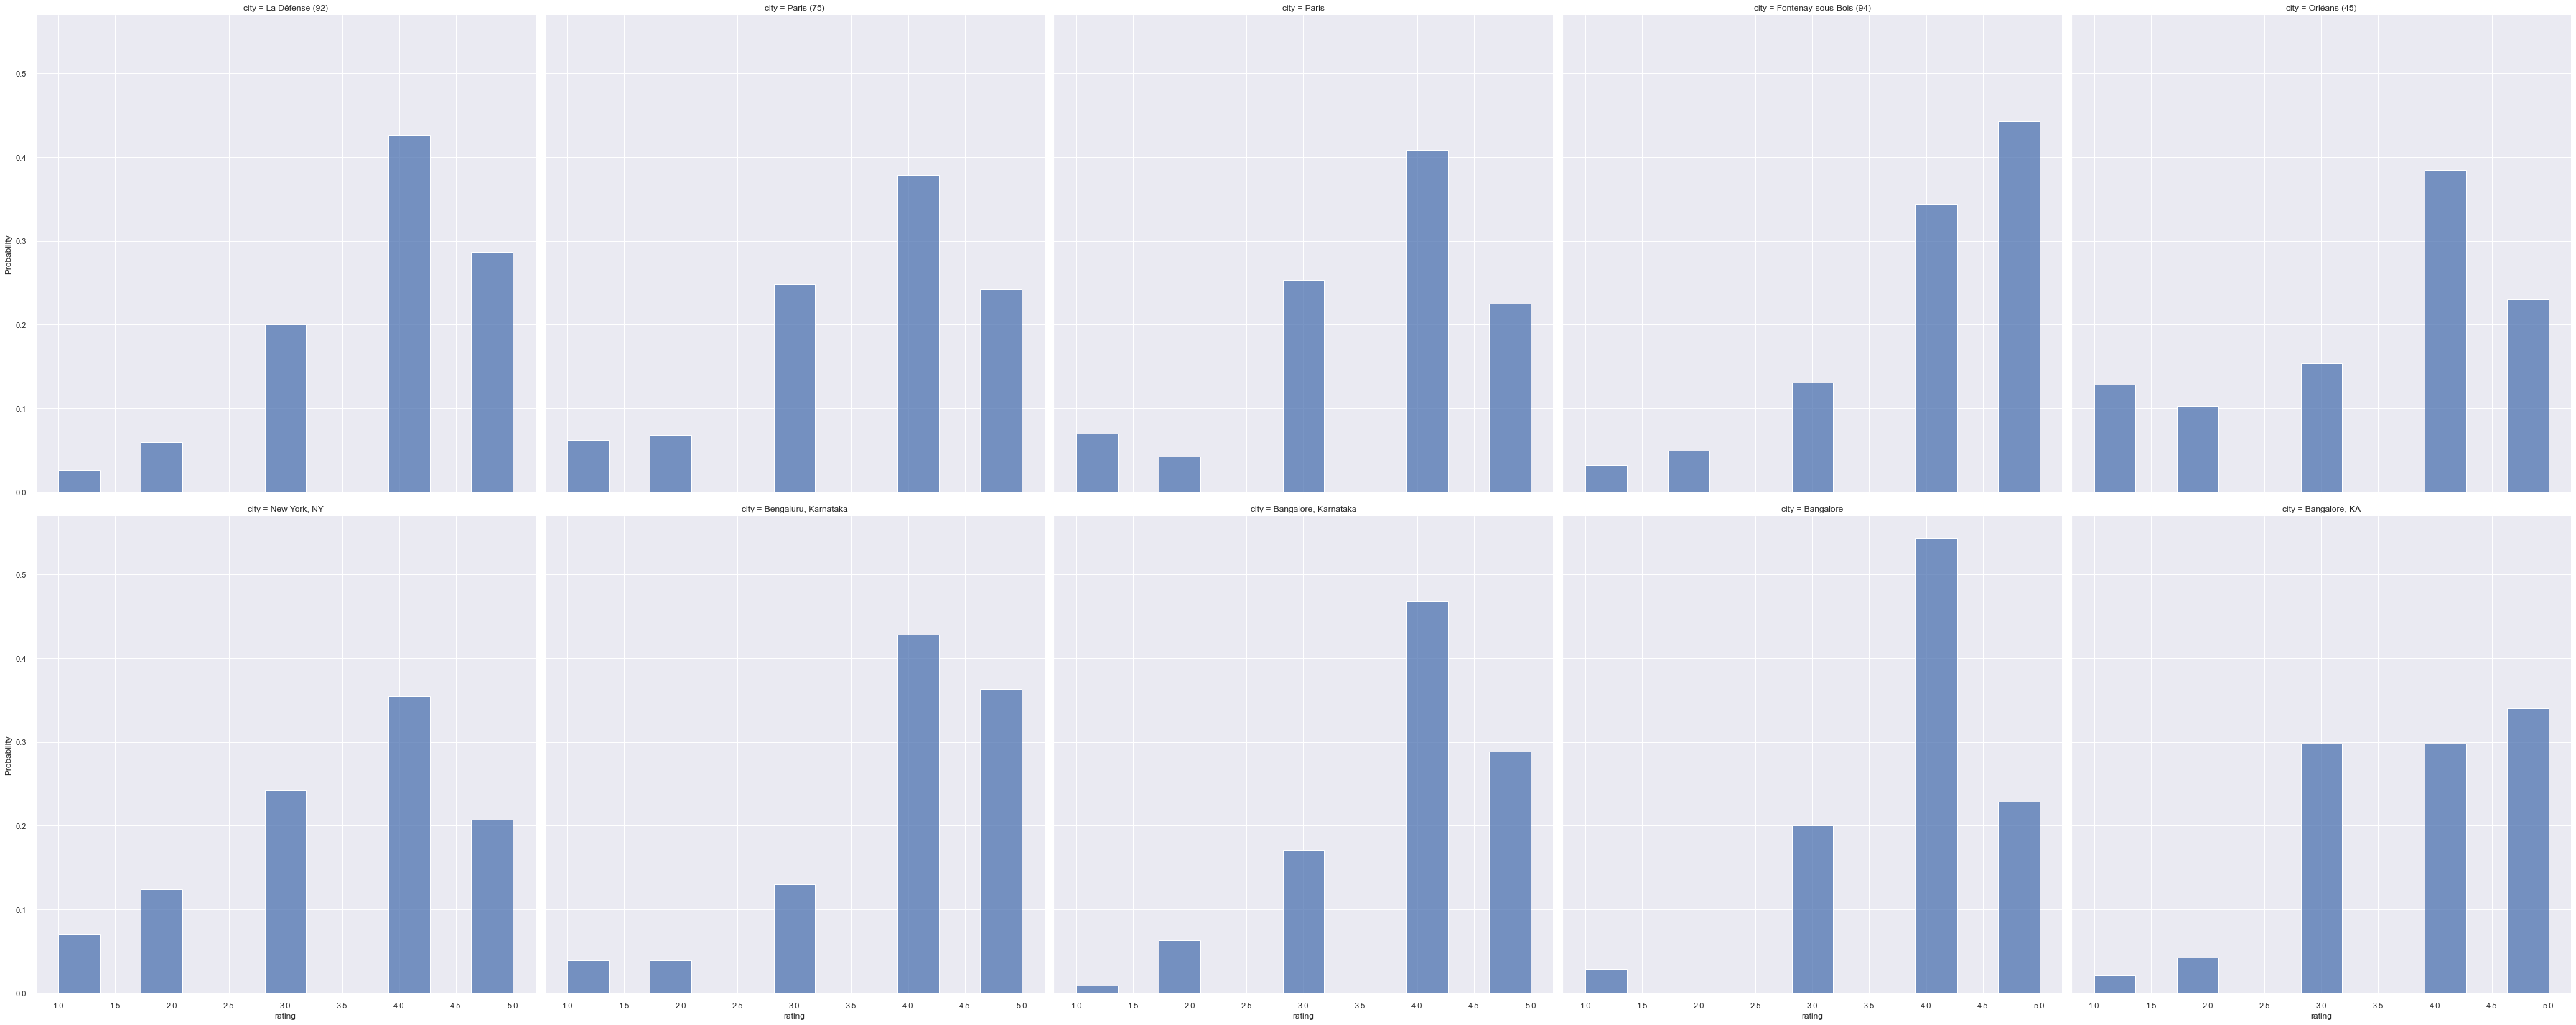

In [73]:
sns.displot(data=sub_df, x='rating', col='city', kind ='hist', height=10, aspect=1, col_wrap=5, stat='probability', common_norm=False)

In [74]:
df_fr=df[df['Country']== 'France']
df_us=df[df['Country']== 'US']
df_in=df[df['Country']== 'Indie']

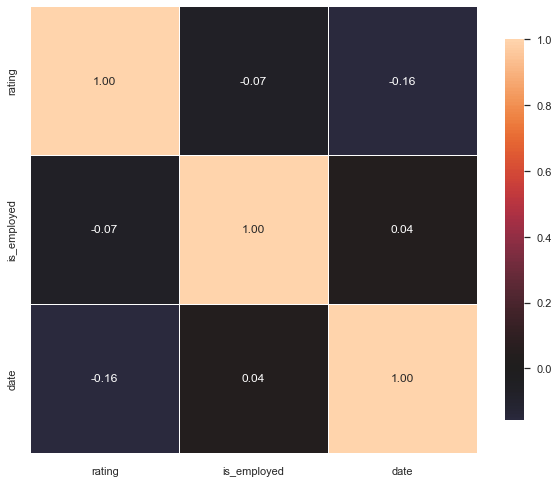

In [75]:
def correlation_heatmap(data):
    correlations = data.corr()
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(df)

on remarque qu'il y pas une correlation important entre nos variables.

In [76]:
df_comment = df.drop(['Country','rating','contract','is_employed','job','date','city'], axis= 1)
df_comment

,comment
0,"Bonne équipe, dommage que la direction soit bl..."
1,"Équipe au top, l'esprit d'équipe fait la force..."
2,"bonne ambiance, bonne équipe, bon relationnel,..."
3,"Missions variées, solidarité dans l’équipe et ..."
4,Première expérience professionnelle durant 3 a...
...,...
2515,A good working environment with good work-life...
2516,"SA 8000, EMS & Social Audits\r\nBPP Audits in ..."
2517,nice banking bussiness. had a great time worki...
2518,This is a euro bank and i had great fun in lea...


In [77]:
def langue(text):
    try:
        return detect(text)
    except:
        return None

In [79]:
df_comment['langues']=df_comment['comment'].apply(langue)
print(f"il n'ya que {len(df_comment.langues.unique())} langues trouvées")
df_comment['langues'].value_counts()

il n'ya que 9 langues trouvées


fr    1727
en     780
es       5
pt       3
it       1
de       1
tr       1
da       1
sl       1
Name: langues, dtype: int64

Comme on peut le constater , les commentaires sont rédigés dans 7 langues et la majorité est en Français. Nous pouvons mieux visualiser à l'aide du graphique ci-dessous.

In [80]:
df_comment

,comment,langues
0,"Bonne équipe, dommage que la direction soit bl...",fr
1,"Équipe au top, l'esprit d'équipe fait la force...",fr
2,"bonne ambiance, bonne équipe, bon relationnel,...",fr
3,"Missions variées, solidarité dans l’équipe et ...",fr
4,Première expérience professionnelle durant 3 a...,fr
...,...,...
2515,A good working environment with good work-life...,en
2516,"SA 8000, EMS & Social Audits\r\nBPP Audits in ...",en
2517,nice banking bussiness. had a great time worki...,en
2518,This is a euro bank and i had great fun in lea...,en


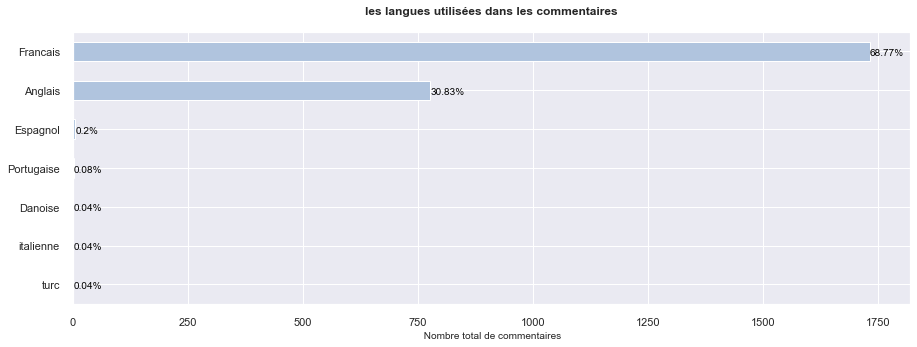

In [17]:
ax=df_comment['langues'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
ax.set_title("les langues utilisées dans les commentaires\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','Espagnol', 'Portugaise','Danoise','italienne','turc'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

la majorité des commentaires est en français (68.77%) ou anglais (30.83%).

# Visualisation des données avec les WordClouds.

Ici il s'agit de representer graphiquement les mots qui reviennent le plus dans les commentaires.

In [164]:
df_comment['comment'] = df_comment['comment'].apply(lambda x: str(x).replace('\n', ' '))
df_comment['comment'] = df_comment['comment'].apply(lambda x: str(x).replace('\r', ' '))

In [165]:
df_comment_fr = df_comment[df_comment['langues'] == 'fr']
df_comment_ang = df_comment[df_comment['langues'] == 'en']

In [166]:
df_comment_a= df_comment[df_comment['langues'] == 'sl']
df_comment_a

,comment,langues
1626,";,:n:n=,l,l,,kmlkùkùpkkp`,nbhjfhsdjvchs dcjds...",sl


In [167]:
df_comment_b= df_comment[df_comment['langues'] == 'it']
df_comment_b

,comment,langues
322,"Bonne ambiance de travail, bon accueil, travai...",it


# Stop-words

Le package gensim nous a fourni les Stop-words anglais et les stop-words francais proviennent du package nltk. Ces derniers ont été enrichis par d'autres stop-words que nous avons défini.

In [185]:
irrelevent = 'Évaluez votre entreprise pour afficher tous les avis Points positifs négatifs très tres plus cette prendre fait membres champs passé agence suivi envers écoute Banque Rien gens comme essaie particulière toujours lot people client thing overall employee place bank opportunity SG year day n’était utilisant choses things years'.split(' ')

stop_word_fr = set(stopwords.words('french'))
stop_word_fr.update(irrelevent)
stop_word_en =set(STOPWORDS)
stop_word_en.update(irrelevent)

# Construction du WordCloud

In [186]:
def plot_wordcloud(df, langue, stop_word_fr):
    wordcloud=WordCloud(max_font_size=None, max_words=50, background_color="white", stopwords=stop_word_fr, random_state=42, width=500, height=500).generate(str(df.values))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' comment\n', fontsize=25, fontweight='bold')
    plt.show()

# WordCloud des commentaires en francais

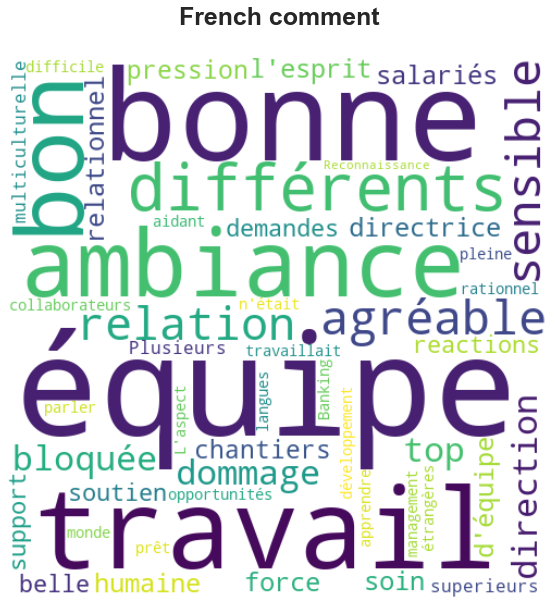

In [187]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_fr['comment'], "French",stop_word_fr)
plt.show()

# WordCloud des commentaires en Anglais

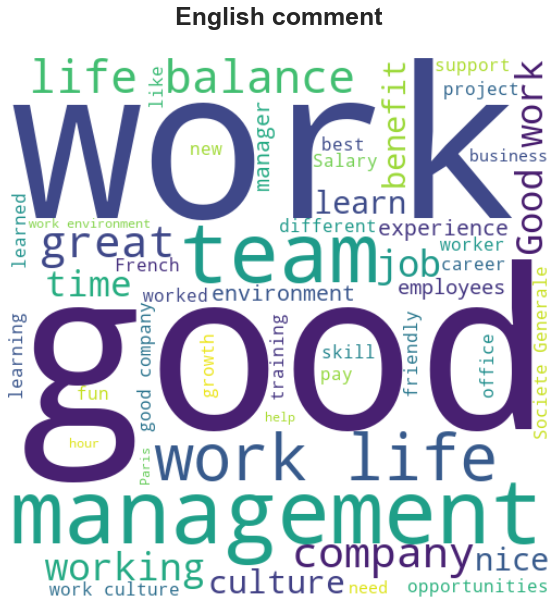

In [188]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_ang['comment'], "English",stop_word_en)
plt.show()

# Analyse sentimentale des commentaires

L'analyse des sentiments consiste essentiellement à juger le sentiment qui se cache derrière un écrit. Elle consiste à prendre un morceau de texte, qu'il s'agisse d'une phrase ou d'un article complet, et à analyser l'émotion que l'auteur exprime. Dans notre analyse, nous allons calculer pour chaque commentaire, le score de sentiment positif, négatif ou neutre qu'il exprime. Nous classerons ensuite chaque commentaire en fonction du sentiment positif, négatif ou neutre.

**Le score de sentiment** indique la probabilité de la nature d'un sentiment exprimé à travers un commentaire.

La bibliothèque VADER renvoie 4 valeurs telles que :

**pos**: La probabilité que le sentiment soit positif

**neu**: La probabilité que le sentiment soit neutre

**neg**: La probabilité que le sentiment soit négatif

**compound**: Le score composé et qui prend des valeurs de -1 à 1

# Score de sentiment pour les commentaires en Français

In [119]:
df_comment_fr['negatif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_fr['neutral_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_fr['positif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_fr['compound_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_fr.head()

C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/2849569866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_fr['negatif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/2849569866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_fr['neutral_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/28495

,comment,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
0,"Bonne équipe, dommage que la direction soit bl...",fr,0.0,1.000,0.000,0.0000
1,"Équipe au top, l'esprit d'équipe fait la force...",fr,0.0,0.935,0.065,0.2023
2,"bonne ambiance, bonne équipe, bon relationnel,...",fr,0.0,1.000,0.000,0.0000
3,"Missions variées, solidarité dans l’équipe et ...",fr,0.0,1.000,0.000,0.0000
4,Première expérience professionnelle durant 3 a...,fr,0.0,0.930,0.070,0.4767


In [111]:
df_comment_fr.shape

(1727, 6)

# Score de sentiment pour les commentaires en Anglais

In [190]:
df_comment_ang['negatif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_ang['neutral_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_ang['positif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_ang['compound_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_ang.head()

C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/3827995492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_ang['negatif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/3827995492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_ang['neutral_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
C:\Users\TALEBA~1\AppData\Local\Temp/ipykernel_16844/3

,comment,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
103,"Good relations in the teams, kind and attentiv...",en,0.000,0.594,0.406,0.8910
218,"French leader in derivative products, Societe ...",en,0.000,0.724,0.276,0.9552
251,"Great place to work, management are supportive...",en,0.030,0.654,0.316,0.9670
260,Good balance between personal life and job. In...,en,0.027,0.893,0.080,0.4317
383,"Very poor management, our team leader was pick...",en,0.178,0.800,0.022,-0.9223


In [193]:
# scores  pour l'anglais et francais
base=pd.concat([df_comment_fr,df_comment_ang])

In [197]:
def histogram(df):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    df.hist('negatif_feeling', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('Negative Sentiment Score')
    df.hist('neutral_feeling', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('Neutral Sentiment Score')
    df.hist('positif_feeling', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
    axes[1,0].set_title('Positive Sentiment Score')
    df.hist('compound_feeling', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
    axes[1,1].set_title('Compound')
    fig.text(0.5, 0.04, 'Scores de sentiment',  fontweight='bold', ha='center')
    fig.text(0.04, 0.5, 'Nombre de commentaires', fontweight='bold', va='center', rotation='vertical')
    plt.suptitle('Analyse sentimentale des employées de SG \n\n', fontsize=12, fontweight='bold');

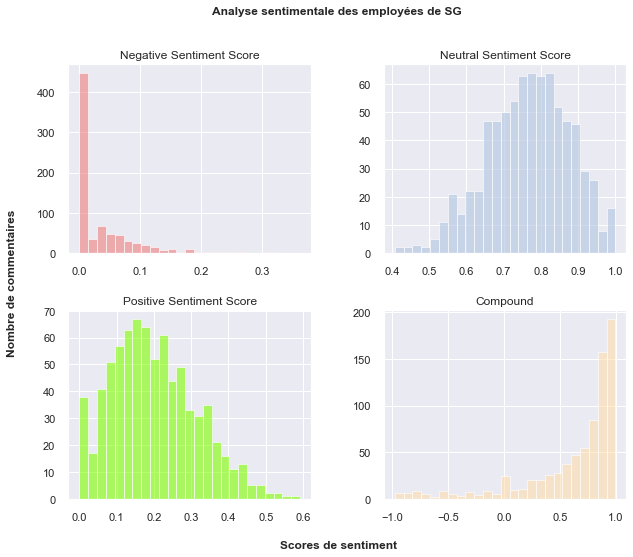

In [198]:
histogram(base)